In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Percepciones eticas de los estudiantes de medicina sobre cuestiones medicas legales.csv',sep=',',encoding='utf-8')

In [ ]:
dataset_tratado = dataset.drop(columns = ['Carimbo de data/hora','Comentarios y opiniones que quieras hacer acerca de algun tema abordado en la encuesta:'])

In [ ]:
dataset_tratado = dataset_tratado.rename(columns={
    'Edad:':'EDAD',
    'Género:':'GENERO',
    '1- ¿Existen momentos en los que es aceptable encubrir o evitar revelar un error, si este error no causa daño al paciente?':'Q01',
    '2- ¿Existen momentos en los que es aceptable encubrir o evitar revelar un error, si este error potencialmente o probablemente perjudicaría al paciente?':'Q02',
    '3- ¿Debería permitirse la asistencia médica al suicidio asistido (eutanasia) en algunas situaciones?':'Q03',
    '4- ¿Es aceptable exagerar o falsificar la condición de un paciente al presentar reclamaciones de beneficios empresariales o de convenio médico?':'Q04',
    '5- ¿Es aceptable romper la confidencialidad del paciente si sabes que el estado de salud de un paciente podría estar perjudicando a otras personas?':'Q05',
    '6- ¿Podrías involucrarte en una relación romántica o sexual con un paciente?':'Q06',
    '7- ¿Debería ser legal que las personas compren órganos para trasplantes si no pudieran recibir un órgano esperando su turno a través de la base de datos nacional?':'Q07',
    '8- ¿Cuál es tu perspectiva sobre la aceptabilidad de la práctica del aborto?':'Q08',
    '9- ¿Cuál es tu opinión sobre la ética y la legalidad de la práctica de la gestación subrogada en la medicina?':'Q09',
    '10- En la situación en la que una mujer remunerada para ser gestante desarrolla afecto por el futuro hijo, ¿cuál es tu perspectiva sobre la aceptabilidad de que continúe con la gestación y decida criar al niño para sí misma?':'Q10',
    '11- ¿Cuál es tu visión sobre la manipulación genética en embriones para el mejoramiento de características físicas o intelectuales?':'Q11',
    '12- Desde tu perspectiva, ¿es aceptable la presencia de ginecólogos del sexo masculino en la práctica ginecológica en todos los contextos médicos, considerando las cuestiones de privacidad y comodidad de las pacientes?':'Q12',
    '13- En casos de enfermedades terminales, ¿es ético permitir que los pacientes accedan a tratamientos experimentales, incluso sin evidencia robusta de eficacia en caso del paciente estar de acuerdo?':'Q13',
    '14- ¿Debería considerarse aceptable la prescripción de medicamentos con alto potencial de dependencia, como los opioides para el alivio del dolor, para los pacientes suceptibles a la dependencia?':'Q14',
    '15- ¿Es justificable el uso de derivados de la Cannabis en la medicina, considerando sus potenciales beneficios terapéuticos en contraste con los riesgos asociados a su consumo?':'Q15',
    })

In [ ]:
import scipy.stats as stats

In [ ]:
import pandas as pd
dados = dataset_tratado
estatisticas_descritivas = dados.describe()
print(estatisticas_descritivas)

In [ ]:
perguntas_q015 = dataset_tratado.loc[:, 'Q01':'Q15']

mapeamento_respostas = {'Estoy de acuerdo.': 1, 'Estoy parcialmente de acuerdo.': 2,
                        'No estoy de acuerdo ni en desacuerdo.': 3,
                        'Estoy parcialmente en desacuerdo.': 4, 'No estoy de acuerdo.': 5}

mapeamento_respostas_2 = {'Estoy de acuerdo.': 1, 'Estoy de acuerdo si la persona ya no es mi paciente hace más de 6 meses.': 2,
                          'No estoy de acuerdo ni en desacuerdo.': 3, 'No estoy de acuerdo.': 4}

mapeamento_respostas_3 = {'Estoy de acuerdo.': 1, 'No estoy de acuerdo ni en desacuerdo.': 2, 'No estoy de acuerdo.': 3}

perguntas_q015['Q06'] = perguntas_q015['Q06'].apply(lambda x: mapeamento_respostas_2.get(x, x))
perguntas_q015['Q10'] = perguntas_q015['Q10'].apply(lambda x: mapeamento_respostas_3.get(x, x))
questoes_tratadas_num = perguntas_q015.apply(lambda x: x.map(mapeamento_respostas.get) if x.name not in ['Q06', 'Q10'] else x)

questoes_tratadas_num.head(31)

In [ ]:
filtro_feminino = dataset_tratado[dataset_tratado['GENERO'] == 'Feminino.']
filtro_masculino = dataset_tratado[dataset_tratado['GENERO'] == 'Masculino.']

In [ ]:
perguntas_q015_fem = filtro_feminino.loc[:, 'Q01':'Q15']

mapeamento_respostas = {'Estoy de acuerdo.': 1, 'Estoy parcialmente de acuerdo.': 2,
                        'No estoy de acuerdo ni en desacuerdo.': 3,
                        'Estoy parcialmente en desacuerdo.': 4, 'No estoy de acuerdo.': 5}

mapeamento_respostas_2 = {'Estoy de acuerdo.': 1, 'Estoy de acuerdo si la persona ya no es mi paciente hace más de 6 meses.': 2,
                          'No estoy de acuerdo ni en desacuerdo.': 3, 'No estoy de acuerdo.': 4}

mapeamento_respostas_3 = {'Estoy de acuerdo.': 1, 'No estoy de acuerdo ni en desacuerdo.': 2, 'No estoy de acuerdo.': 3}

perguntas_q015_fem['Q06'] = perguntas_q015_fem['Q06'].apply(lambda x: mapeamento_respostas_2.get(x, x))
perguntas_q015_fem['Q10'] = perguntas_q015_fem['Q10'].apply(lambda x: mapeamento_respostas_3.get(x, x))
filtro_feminino_num = perguntas_q015_fem.apply(lambda x: x.map(mapeamento_respostas.get) if x.name not in ['Q06', 'Q10'] else x)

In [ ]:
perguntas_q015_masc = filtro_masculino.loc[:, 'Q01':'Q15']

mapeamento_respostas = {'Estoy de acuerdo.': 1, 'Estoy parcialmente de acuerdo.': 2,
                        'No estoy de acuerdo ni en desacuerdo.': 3,
                        'Estoy parcialmente en desacuerdo.': 4, 'No estoy de acuerdo.': 5}

mapeamento_respostas_2 = {'Estoy de acuerdo.': 1, 'Estoy de acuerdo si la persona ya no es mi paciente hace más de 6 meses.': 2,
                          'No estoy de acuerdo ni en desacuerdo.': 3, 'No estoy de acuerdo.': 4}

mapeamento_respostas_3 = {'Estoy de acuerdo.': 1, 'No estoy de acuerdo ni en desacuerdo.': 2, 'No estoy de acuerdo.': 3}

perguntas_q015_masc['Q06'] = perguntas_q015_masc['Q06'].apply(lambda x: mapeamento_respostas_2.get(x, x))
perguntas_q015_masc['Q10'] = perguntas_q015_masc['Q10'].apply(lambda x: mapeamento_respostas_3.get(x, x))
filtro_masculino_num = perguntas_q015_masc.apply(lambda x: x.map(mapeamento_respostas.get) if x.name not in ['Q06', 'Q10'] else x)

In [ ]:
## TODAS OS DATASETS:
dataset_tratado.head()
questoes_tratadas_num.head()
filtro_feminino.head()
filtro_masculino.head()
filtro_masculino_num.head()
filtro_feminino_num.head()

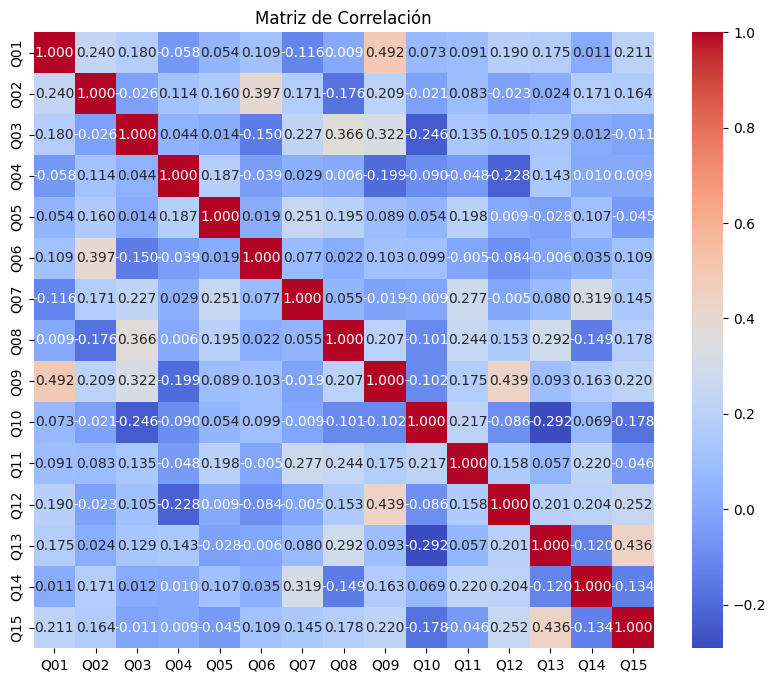

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
matriz_correlacao = questoes_tratadas_num.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Matriz de Correlación')
plt.show()


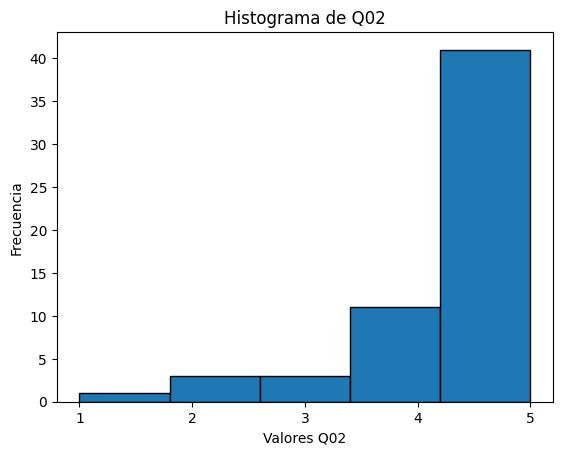

In [ ]:
import matplotlib.pyplot as plt

q02 = questoes_tratadas_num['Q02']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores Q02')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q02')
plt.xticks(range(1, 6))
plt.show()


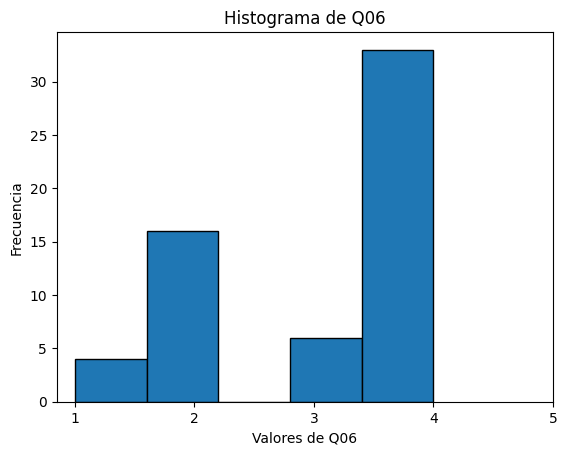

In [ ]:
import matplotlib.pyplot as plt

q02 = questoes_tratadas_num['Q06']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q06')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q06')
plt.xticks(range(1, 6))
plt.show()


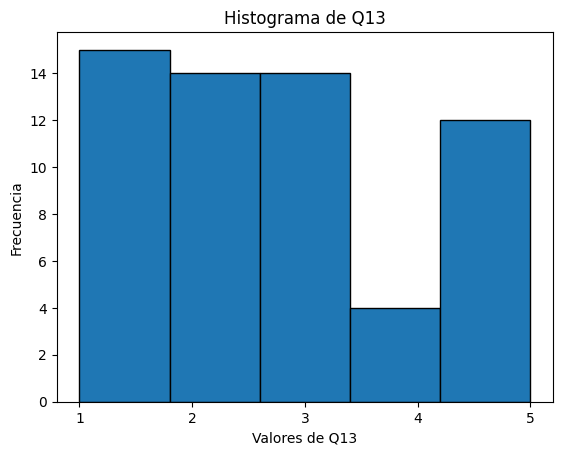

In [ ]:
import matplotlib.pyplot as plt

q02 = questoes_tratadas_num['Q13']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q13')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q13')
plt.xticks(range(1, 6))
plt.show()

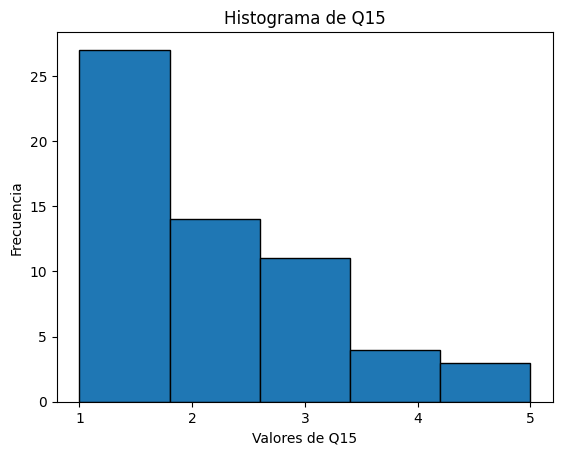

In [ ]:
import matplotlib.pyplot as plt

q02 = questoes_tratadas_num['Q15']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q15')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q15')
plt.xticks(range(1, 6))
plt.show()

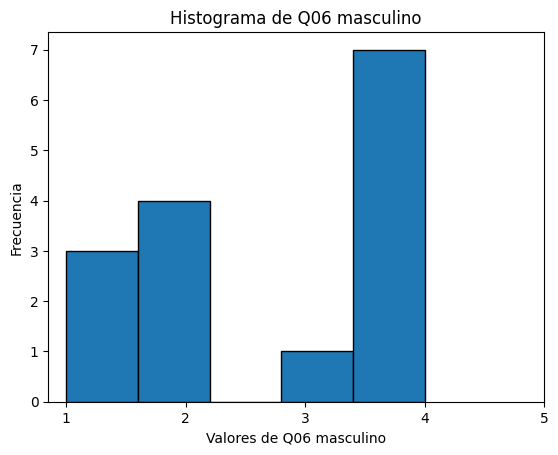

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_masculino_num['Q06']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q06 masculino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q06 masculino')
plt.xticks(range(1, 6))
plt.show()

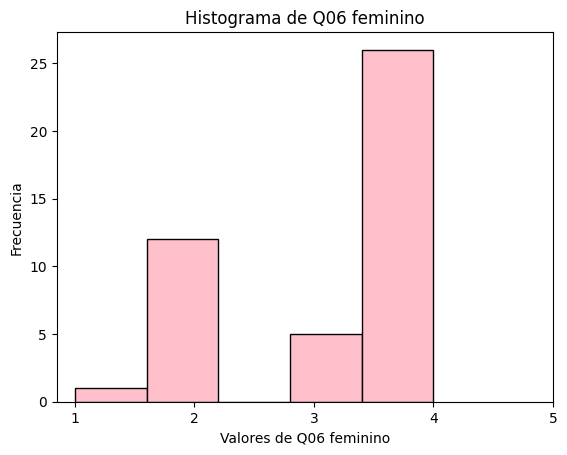

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_feminino_num['Q06']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black',color= 'pink')
ax.set_xlabel('Valores de Q06 feminino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q06 feminino')
plt.xticks(range(1, 6))
plt.show()

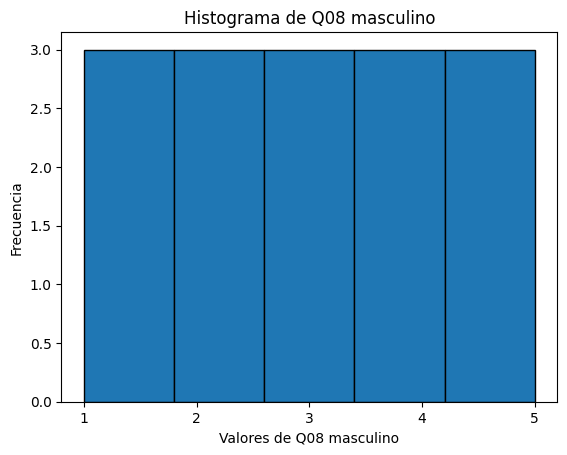

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_masculino_num['Q08']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q08 masculino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q08 masculino')
plt.xticks(range(1, 6))
plt.show()

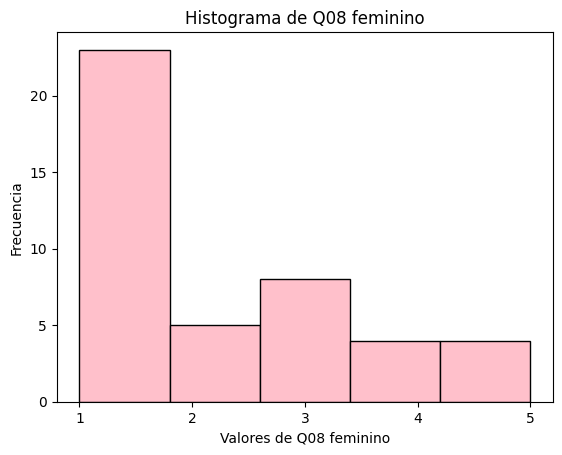

In [88]:
import matplotlib.pyplot as plt

q02 = filtro_feminino_num['Q08']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black',color= 'pink')
ax.set_xlabel('Valores de Q08 feminino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q08 feminino')
plt.xticks(range(1, 6))
plt.show()

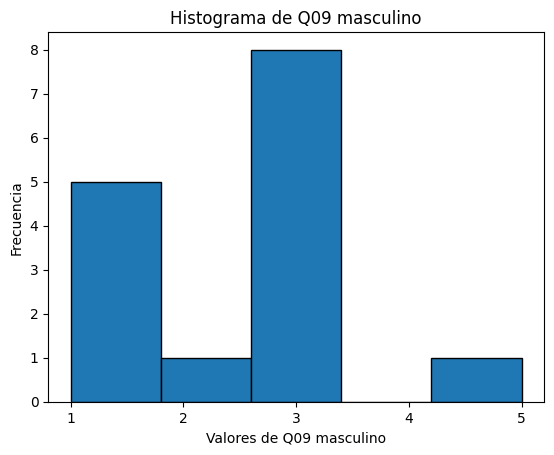

In [ ]:
import matplotlib.pyplot as plt


q02 = filtro_masculino_num['Q09']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q09 masculino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q09 masculino')
plt.xticks(range(1, 6))
plt.show()

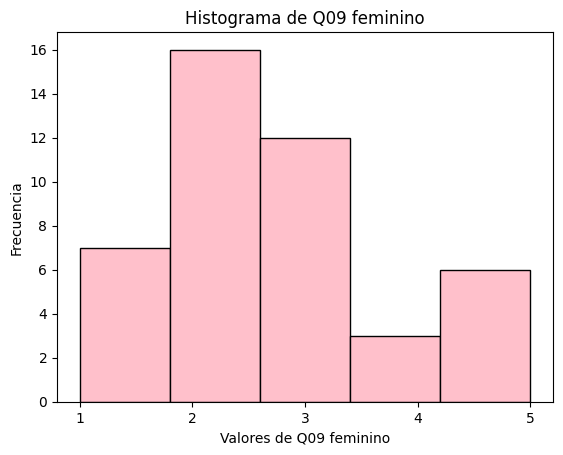

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_feminino_num['Q09']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black',color= 'pink')
ax.set_xlabel('Valores de Q09 feminino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q09 feminino')
plt.xticks(range(1, 6))
plt.show()

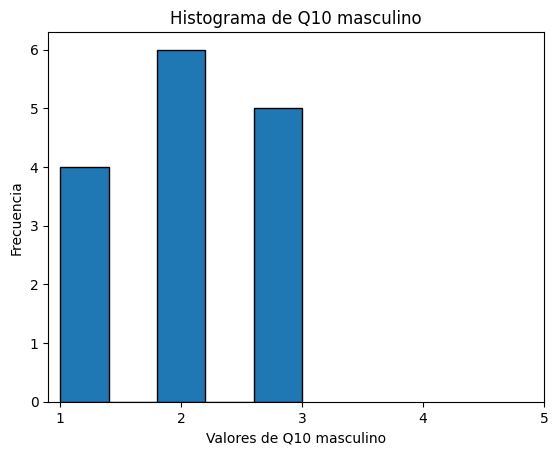

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_masculino_num['Q10']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q10 masculino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q10 masculino')
plt.xticks(range(1, 6))
plt.show()

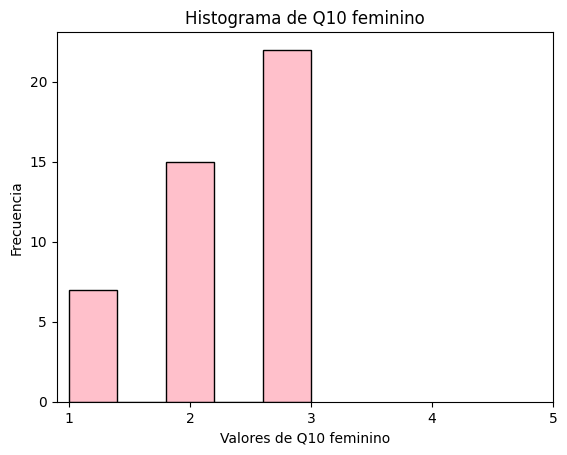

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_feminino_num['Q10']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black',color= 'pink')
ax.set_xlabel('Valores de Q10 feminino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q10 feminino')
plt.xticks(range(1, 6))
plt.show()

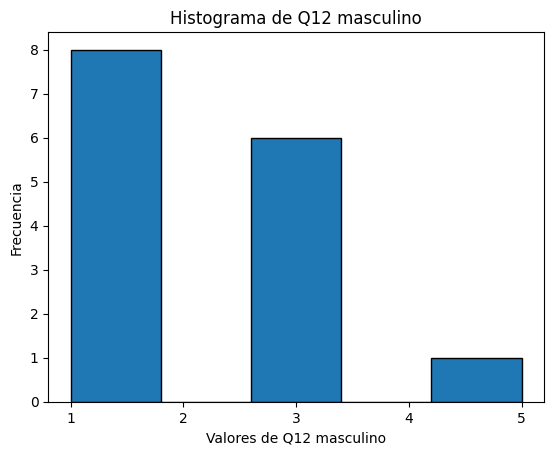

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_masculino_num['Q12']
fig, ax = plt.subplots()


ax.hist(q02, bins=5, edgecolor='black')
ax.set_xlabel('Valores de Q12 masculino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q12 masculino')
plt.xticks(range(1, 6))
plt.show()

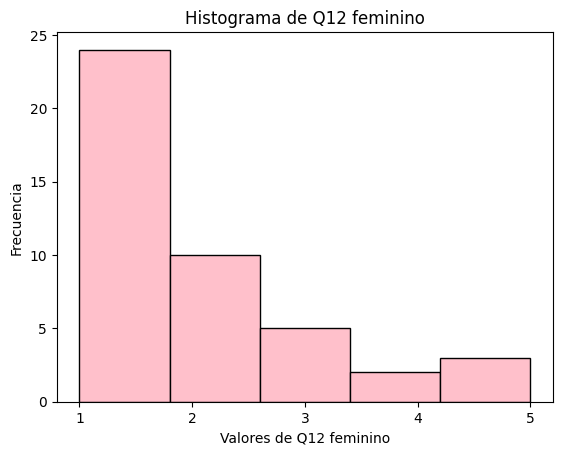

In [ ]:
import matplotlib.pyplot as plt

q02 = filtro_feminino_num['Q12']
fig, ax = plt.subplots()

ax.hist(q02, bins=5, edgecolor='black',color= 'pink')
ax.set_xlabel('Valores de Q12 feminino')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Q12 feminino')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
## TODAS OS DATASETS:
# dataset_tratado.head()
# questoes_tratadas_num.head()
# filtro_feminino.head()
# filtro_masculino.head()
# filtro_masculino_num.head()
# filtro_feminino_num.head()